In [1]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph, END
import random

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [6]:
def greetingNode(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state['name']}"
    state['number'] = []  # Should be a list, not 0
    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 1 to 10"""
    state['number'].append(random.randint(1, 10))
    state['counter'] += 1
    return state

def should_continue(state: AgentState) -> str:
    """Checks if the counter is less than 5"""
    if state['counter'] < 5:
        print("Entering loop", state['counter'])
        return "loop"
    else:
        return "exit"

In [7]:
graph = StateGraph(AgentState)
graph.add_node("greet", greetingNode)
graph.add_node("random", random_node)
graph.add_edge("greet", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END,
    },
)

graph.set_entry_point("greet")
app = graph.compile()



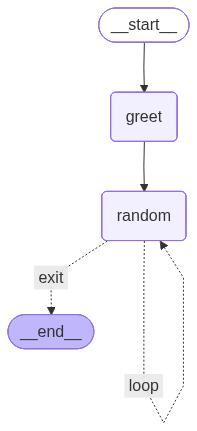

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [13]:

app.invoke({"name":"Nikhil","number":[],"counter":-5})

Entering loop -4
Entering loop -3
Entering loop -2
Entering loop -1
Entering loop 0
Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4


{'name': 'Hi there, Nikhil',
 'number': [8, 1, 1, 9, 9, 4, 4, 10, 10, 5],
 'counter': 5}